In [1]:
def import_all():
    import numpy as np
    import pandas as pd
    import sklearn
    import seaborn as sns

    from sklearn.preprocessing import Imputer, StandardScaler
    from sklearn.linear_model import Lasso, ElasticNet, LogisticRegression
    from sklearn.model_selection import train_test_split

    import matplotlib.pyplot as plt
    return np, pd, sns, Imputer, StandardScaler, Lasso, ElasticNet, LogisticRegression, train_test_split, plt

def load_data():
    test = pd.read_csv('./test.csv')
    train = pd.read_csv('./train.csv')
    return train, test

def expl_data(df):
    head = df.head()
    null_sum = df.isnull().sum()
    dtypes = df.dtypes
    return head, null_sum, dtypes

def make_heatmap(df):
    corr = df.corr()

    fig, ax = plt.subplots(figsize=(16,14))

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    plt.show()

def make_binary(train):
    abnorm_val = pd.get_dummies(train['Sale Condition'])
    abnorm = abnorm_val[['Abnorml']]
    train['Sale Condition'] = abnorm['Abnorml']
    return train

In [2]:
def dvf(td1,td2):
    
    def returnNotMatches(a, b):
        return [[x for x in b if x not in a], [x for x in a if x not in b]]
                
    for x in td1.columns:            
                   
        if td1[x].dtype == "object": 
    
            dummies = pd.get_dummies(td1[x])
            column_names = []
            for y in dummies.columns:
                column_names.append(x + "_" + y)
            dummies.columns = column_names
            td1_dummies = dummies
            td1 = pd.concat([td1, dummies], axis=1)
            del td1[x]
            
        else:
            
            if len(td1.loc[:][td1[x].isnull() > 0]) > 0:
                
                imp = Imputer(missing_values='NaN', strategy='median', axis=0)
                td1[x] = imp.fit_transform(td1[x].values.reshape(-1, 1))
                                
        if td2[x].dtype == "object": 
    
            dummies = pd.get_dummies(td2[x])
            column_names = []
            for y in dummies.columns:
                column_names.append(x + "_" + y)
            dummies.columns = column_names
            td2_dummies = dummies
            td2 = pd.concat([td2, dummies], axis=1)
            del td2[x]
            
            comparison = returnNotMatches(td1_dummies.columns, td2_dummies.columns)
            
            if comparison[0] != []:
                
                d = pd.DataFrame(np.zeros((len(td1), len(comparison[0]))), columns=comparison[0]).astype(int)
                td1 = pd.concat([td1, d], axis=1)

                
            if comparison[1] != []:
                
                d = pd.DataFrame(np.zeros((len(td2), len(comparison[1]))), columns=comparison[1]).astype(int)
                td2 = pd.concat([td2, d], axis=1)  
                
        else:
            
            if len(td2.loc[:][td2[x].isnull() > 0]) > 0:
                
                imp = Imputer(missing_values='NaN', strategy='median', axis=0)
                td2[x] = imp.fit_transform(td2[x].values.reshape(-1, 1))
                
    td2.columns = td1.columns            
    return td1,td2

In [3]:
np, pd, sns, Imputer, StandardScaler, Lasso, ElasticNet, LogisticRegression, train_test_split, plt = import_all()
train, test = load_data()
head, null_sum, dtypes = expl_data(train)
# train = make_binary(train)

In [3]:
print(head)
print('null values:', null_sum)
print('dtypes:', dtypes)

    Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour    ...     Pool Area Pool QC Fence Misc Feature  \
0       IR1          Lvl    ...             0     NaN   NaN          NaN   
1       IR1          Lvl    ...             0     NaN   NaN          NaN   
2       Reg          Lvl    ...             0     NaN   NaN          NaN   
3       Reg          Lvl    ...             0     NaN   NaN          NaN   
4       IR1          Lvl    ...             0     NaN   NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  Sa

In [76]:
#First Run-Through, Try w/ Dropping all NAN
#train.dropna(inplace=True)
# Does not work, drops all rows

In [77]:
#Second Run-Through, Try w/ droppping cols with >1000 NAN

In [78]:
train['Sale Condition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'Family', 'Alloca', 'AdjLand'], dtype=object)

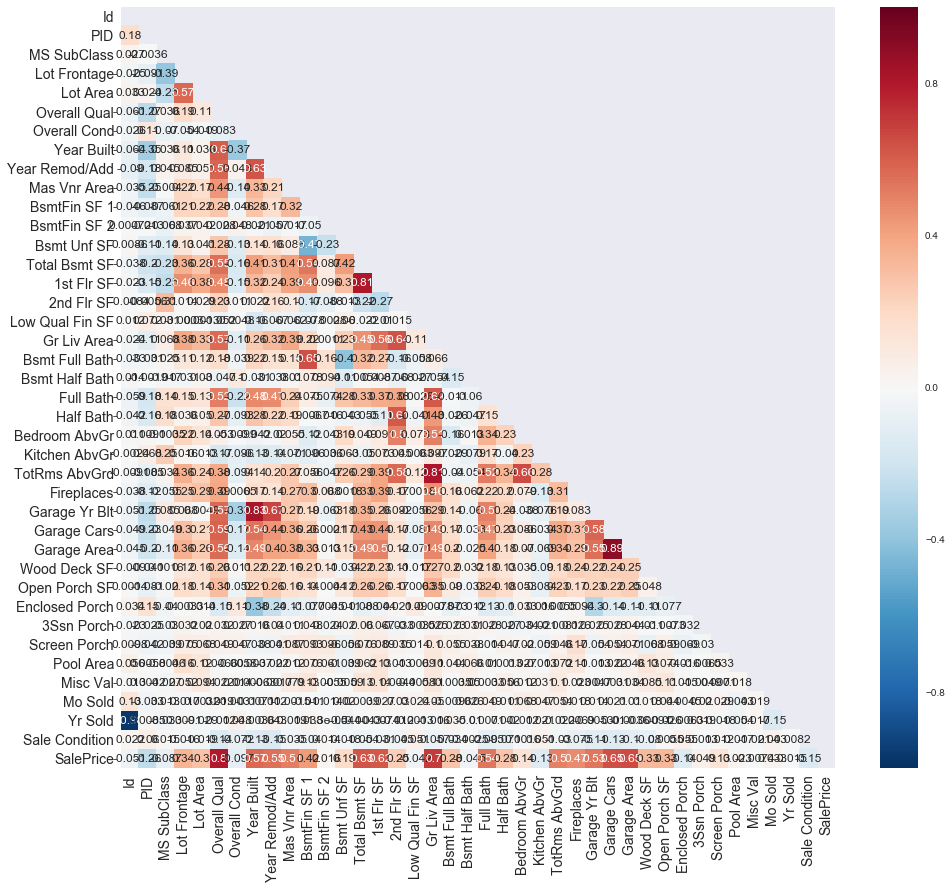

In [4]:
make_heatmap(train)

In [80]:
# # Make dummies of Sale Condition
# # We need just the abnorml column
# abnorm_val = pd.get_dummies(train['Sale Condition'])       

# # We are assuming Abnorml as 1 and all others, Normal and else, as 0
# # Abnorml df into its own variable
# abnorm = abnorm_val[['Abnorml']]

# # We need normal(and else) 0 and abnormal 1
# # Replace Sale Condition with Abnorml 
# train['Sale Condition'] = abnorm['Abnorml']

# #this is now all in make_binary function

In [133]:
# Success!
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [ ]:
# Sale Condition now represents Abnormal = 1 and not abnormal = 0

In [113]:
train['Overall Qual'].isnull().sum()

0

In [11]:
#Get our X and y conditions
y = train[['Sale Condition']].values
# Trying Yr Sold, Overall Qual, and Gr Liv Area
X = train[['Yr Sold']].values

In [ ]:
train = make_binary(train)

In [8]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,0


In [10]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [25]:
train, test = load_data()

In [26]:
del train['SalePrice']

In [27]:
X = train[[col for col in train.columns if col !='Sale Condition']].copy()
y = train[['Sale Condition']].copy()

In [28]:
y = y['Sale Condition'].map(lambda x : 1 if x == "Abnorml" else 0)

In [29]:
X, test = dvf(X, test)

In [30]:
ss = StandardScaler()
ss.fit(X)
standard_X = ss.transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(standard_X,y)

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('reg score',logreg.score(X_test, y_test))

print('reg predict', logreg.predict(X_test))

X.head()

reg score 0.914230019493
reg predict [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Type_VWD
0,109,533352170,60,68.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,1,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,1,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,1,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,1,0


In [39]:

k = logreg.predict(standard_test_X)
k = [(x-1)*-1 for x in k]
k = pd.DataFrame(k, columns=["Sale Condition"])
k = pd.concat([test.Id,k], axis=1)
k = k.set_index("Id")
k.to_csv('predictions.csv')

In [37]:
standard_test_X = ss.transform(test)

In [34]:
logreg.predict(standard_test_X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [18]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [7]:
# X and y into Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\Banchan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
logreg.intercept_

array([ -6.64003599e-07])

In [9]:
logreg.coef_

array([[-0.00133321]])

In [10]:
logreg.predict_proba(X)

array([[ 0.9358208 ,  0.0641792 ],
       [ 0.93574068,  0.06425932],
       [ 0.9358208 ,  0.0641792 ],
       ..., 
       [ 0.93574068,  0.06425932],
       [ 0.93574068,  0.06425932],
       [ 0.9358208 ,  0.0641792 ]])

In [11]:
xval_chance = (-1 * logreg.intercept_[0])/logreg.coef_[0][0]
print(xval_chance*logreg.coef_[0][0] + logreg.intercept_)
print(xval_chance)

logreg.predict_proba([[xval_chance]])

[ -1.05879118e-22]
-0.000498050231996


array([[ 0.5,  0.5]])

In [14]:
def plt_logist(admit, x_val):
    # Some nice colors we can use in our plots:
    colors = {'blue': '#729ECE',
          'brown': '#A8786E',
          'green': '#67BF5C',
          'grey': '#A2A2A2',
          'orange': '#FF9E4A',
          'pink': '#ED97CA',
          'purple': '#AD8BC9',
          'red': '#ED665D',
          'teal': '#6DCCDA',
          'yellow': '#CDCC5D'}
    
    fig, ax = plt.subplots(figsize=(10,6))

    # plot the logreg regression line for admit ~ gpa
    x_vals = np.linspace(-1.,5.,300)
    y_pp = logreg.predict_proba(x_vals[:, np.newaxis])[:,1]

    ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

    # do one scatter plot for each type of wine:
    ax.scatter(admit[x_val][admit['Sale Condition'] == 0],
               admit['Sale Condition'][admit['Sale Condition'] == 0],
               c=colors['orange'], s=100, alpha=0.7,
               label='rejected')

    ax.scatter(admit[x_val][admit['Sale Condition'] == 1],
               admit['Sale Condition'][admit['Sale Condition'] == 1],
               c=colors['blue'], s=100, alpha=0.7,
               label='admitted')

    ax.axvline(xval_chance, lw=3, color=colors['red'], ls='dashed',
               label='gpa where P(y = 1) = 0.5')

    ax.set_ylabel('Sale Condition', fontsize=16)
    ax.set_xlabel('Yr Sold', fontsize=16)
    ax.set_title('Sale Condition ~ Yr Sold, prestige=1\n', fontsize=20)

    ax.set_xlim([2.,5.])
    ax.set_ylim([-0.1, 1.1])

    plt.legend(loc='upper left')
    plt.show()

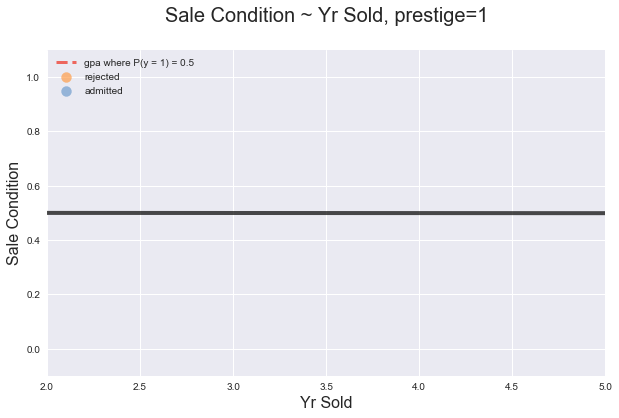

In [15]:
plt_logist(train, 'Yr Sold')